<a href="https://colab.research.google.com/github/Bhavya0825/road-accident-analysis/blob/main/road_accident_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🧾 1. Importing Libraries

In [61]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')


📁 2. Load and Clean the Data

In [ ]:
# Load datasets
df_accidents = pd.read_csv('AccidentsBig.csv', on_bad_lines='skip')
df_vehicles = pd.read_csv('VehiclesBig.csv')
df_casualties = pd.read_csv('CasualtiesBig.csv')

# Drop duplicates
df_accidents.drop_duplicates(inplace=True)
df_vehicles.drop_duplicates(inplace=True)
df_casualties.drop_duplicates(inplace=True)

# Fill missing values
df_accidents.fillna('Unknown', inplace=True)
df_vehicles.fillna('Unknown', inplace=True)
df_casualties.fillna('Unknown', inplace=True)


 🔍 3. Exploratory Data Analysis (EDA)

📊 3.1 Top Districts by Accidents

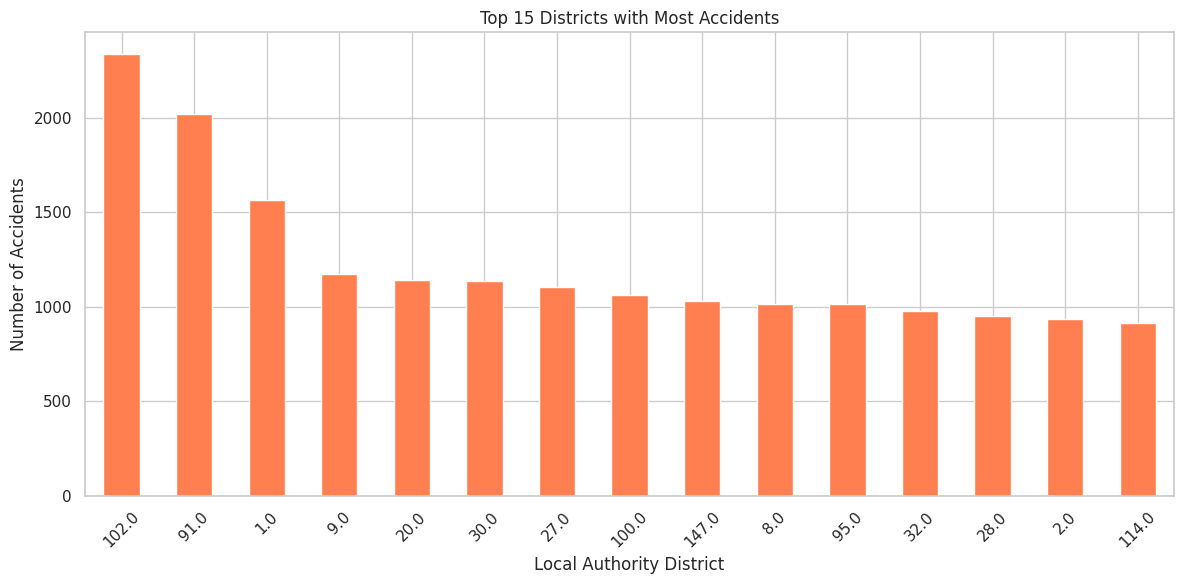

In [69]:
plt.figure(figsize=(12,6))
df_accidents['Local_Authority_(District)'].value_counts().head(15).plot(kind='bar', color='coral')
plt.title('Top 15 Districts with Most Accidents')
plt.xlabel('Local Authority District')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



📅 3.2 Accidents Over the Years

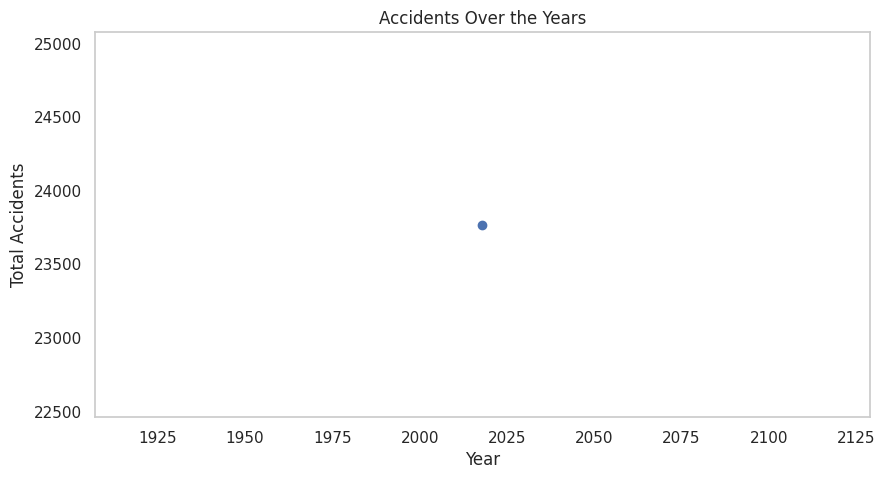

In [72]:
# Convert Date column to datetime format
df_accidents['Date'] = pd.to_datetime(df_accidents['Date'], errors='coerce')

# Extract year from the date
df_accidents['Year'] = df_accidents['Date'].dt.year

if 'Year' in df_accidents.columns:
    plt.figure(figsize=(10,5))
    df_accidents['Year'].value_counts().sort_index().plot(kind='line', marker='o')
    plt.title('Accidents Over the Years')
    plt.xlabel('Year')
    plt.ylabel('Total Accidents')
    plt.grid()
    plt.show()


🚗 3.3 Most Common Vehicle Types

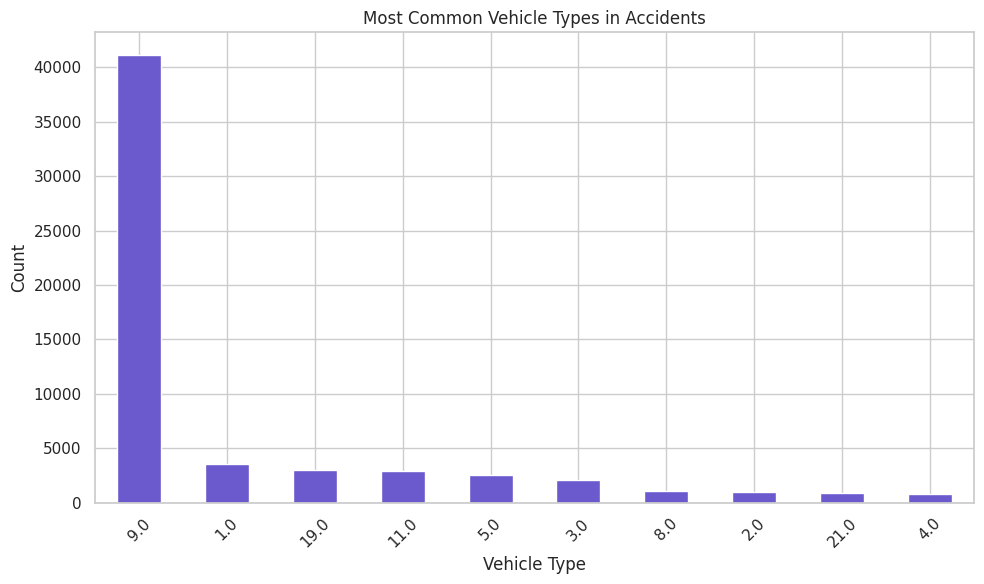

In [73]:
plt.figure(figsize=(10,6))
df_vehicles['Vehicle_Type'].value_counts().head(10).plot(kind='bar', color='slateblue')
plt.title('Most Common Vehicle Types in Accidents')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


☠️ 3.4 Casualty Severity Distribution

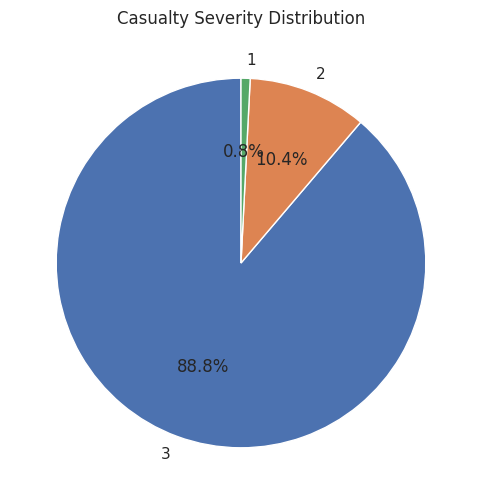

In [74]:
plt.figure(figsize=(6,6))
df_casualties['Casualty_Severity'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Casualty Severity Distribution')
plt.ylabel('')
plt.show()


 Derive Insights & Trends

In [75]:
# Correct way to fill missing values using .loc[]
df_accidents.loc[:, 'Number_of_Vehicles'] = df_accidents['Number_of_Vehicles'].fillna(0)
df_accidents.loc[:, 'Number_of_Casualties'] = df_accidents['Number_of_Casualties'].fillna(0)



In [76]:
# Basic summary of the numerical columns
df_accidents.describe()


,Date,Year
count,23769,23769.0
mean,2018-06-24 06:36:09.178341376,2018.0
min,2018-01-01 00:00:00,2018.0
25%,2018-04-02 00:00:00,2018.0
50%,2018-07-02 00:00:00,2018.0
75%,2018-10-02 00:00:00,2018.0
max,2018-12-12 00:00:00,2018.0
std,NaN,0.0


📈 5. Univariate Visualizations

<ipython-input-78-a3f828f75915>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_accidents['Number_of_Vehicles'].fillna(0, inplace=True)
<ipython-input-78-a3f828f75915>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

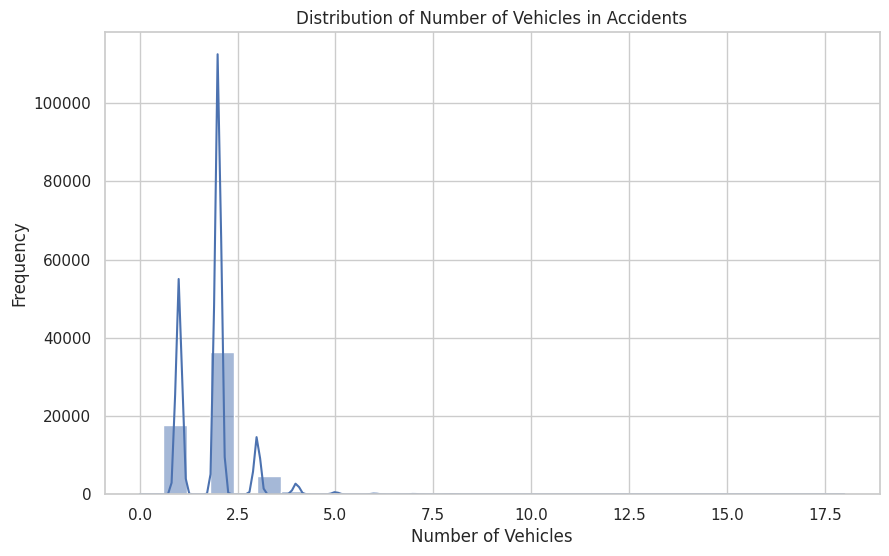

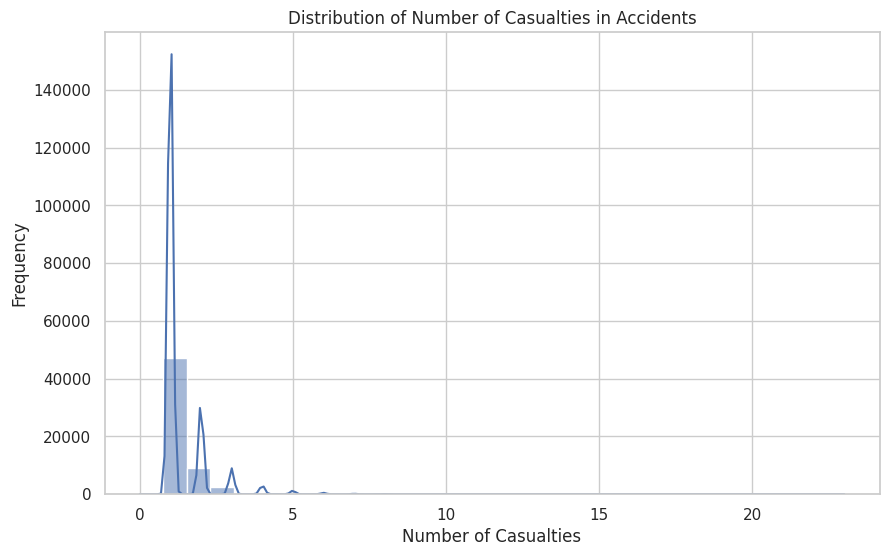

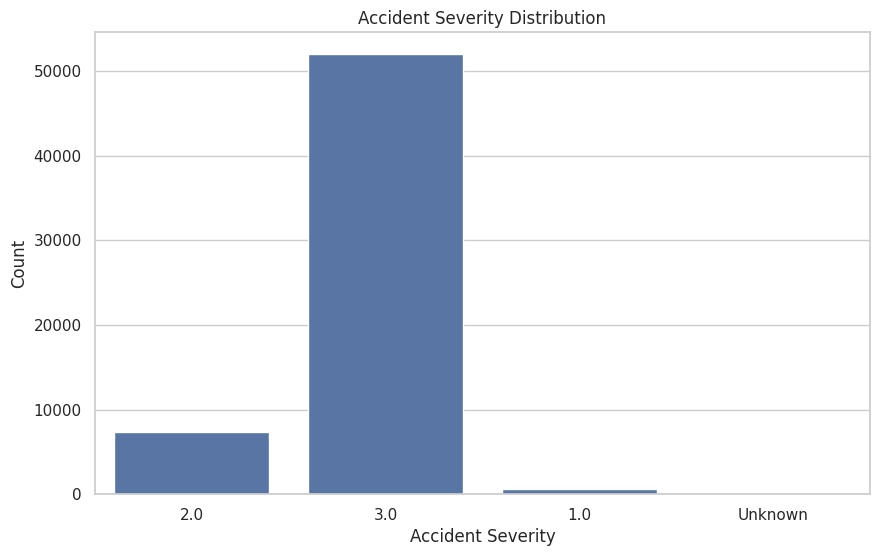

In [78]:
# Convert non-numeric values in 'Number_of_Vehicles' and 'Number_of_Casualties' to NaN
df_accidents['Number_of_Vehicles'] = pd.to_numeric(df_accidents['Number_of_Vehicles'], errors='coerce')
df_accidents['Number_of_Casualties'] = pd.to_numeric(df_accidents['Number_of_Casualties'], errors='coerce')

# Optionally, you can fill NaN values with 0 (or any other suitable value)
df_accidents['Number_of_Vehicles'].fillna(0, inplace=True)
df_accidents['Number_of_Casualties'].fillna(0, inplace=True)

# Now plot the distribution again
# Plot distribution of number of vehicles in accidents
plt.figure(figsize=(10, 6))
sns.histplot(df_accidents['Number_of_Vehicles'], kde=True, bins=30)
plt.title('Distribution of Number of Vehicles in Accidents')
plt.xlabel('Number of Vehicles')
plt.ylabel('Frequency')
plt.show()

# Plot distribution of number of casualties in accidents
plt.figure(figsize=(10, 6))
sns.histplot(df_accidents['Number_of_Casualties'], kde=True, bins=30)
plt.title('Distribution of Number of Casualties in Accidents')
plt.xlabel('Number of Casualties')
plt.ylabel('Frequency')
plt.show()

# Plot distribution of accident severity
plt.figure(figsize=(10, 6))
sns.countplot(x='Accident_Severity', data=df_accidents)
plt.title('Accident Severity Distribution')
plt.xlabel('Accident Severity')
plt.ylabel('Count')
plt.show()



🔗 6. Correlation Analysis

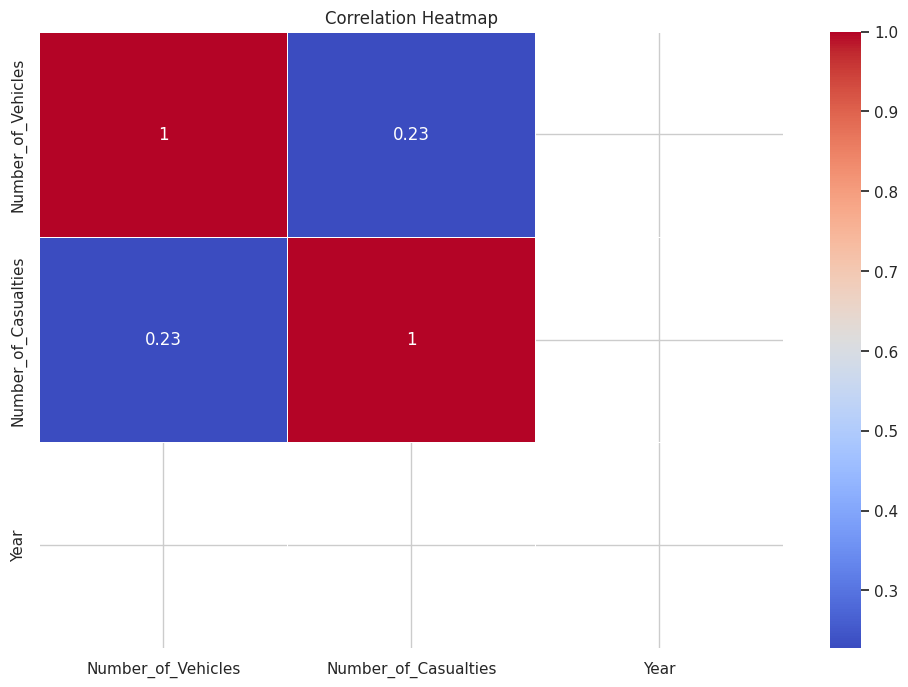

In [79]:
# Select only numeric columns for correlation calculation
df_numeric = df_accidents.select_dtypes(include=['number'])

# Calculate and plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()



📆 7. Temporal Analysis

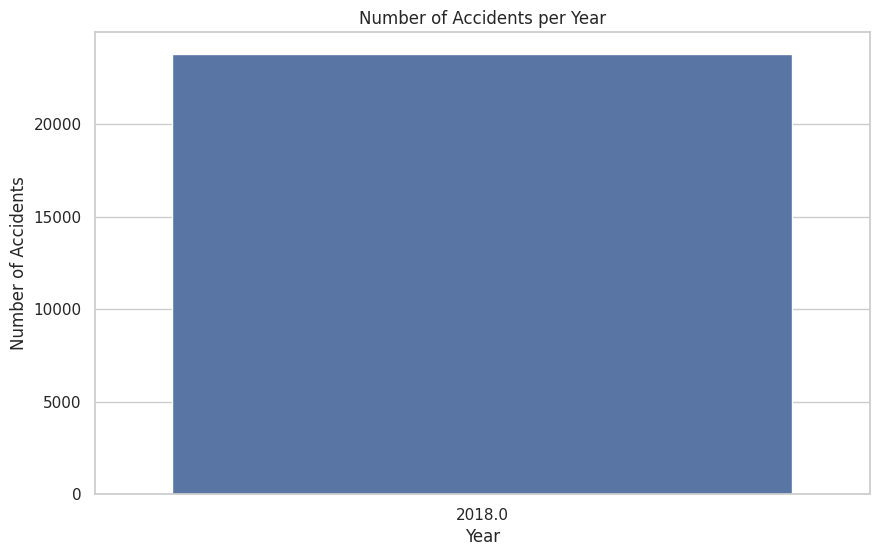

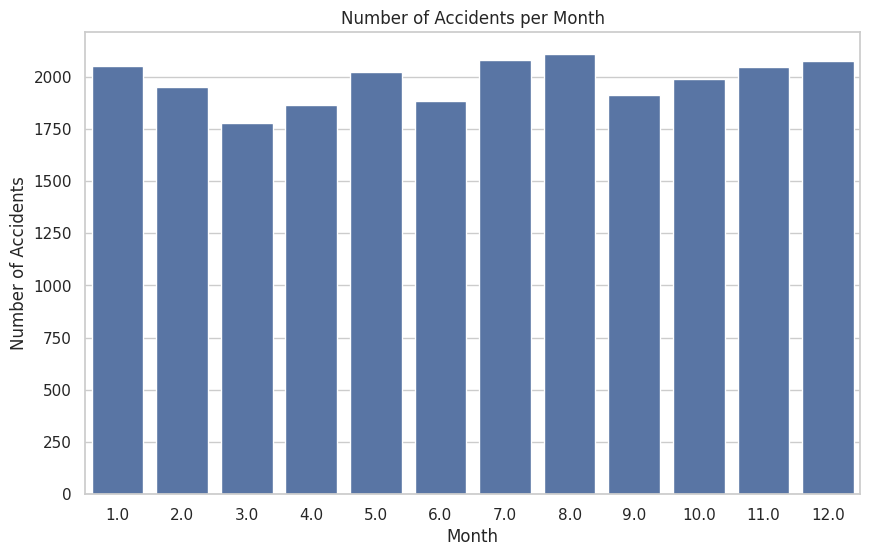

In [80]:
# Convert 'Date' to datetime format
df_accidents['Date'] = pd.to_datetime(df_accidents['Date'])

# Extract year and month for analysis
df_accidents['Year'] = df_accidents['Date'].dt.year
df_accidents['Month'] = df_accidents['Date'].dt.month

# Plot accidents per year
plt.figure(figsize=(10, 6))
sns.countplot(x='Year', data=df_accidents)
plt.title('Number of Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

# Plot accidents per month
plt.figure(figsize=(10, 6))
sns.countplot(x='Month', data=df_accidents)
plt.title('Number of Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()


💥 8. Insights by Category
🧍‍♂️ 8.1 Casualties by Severity

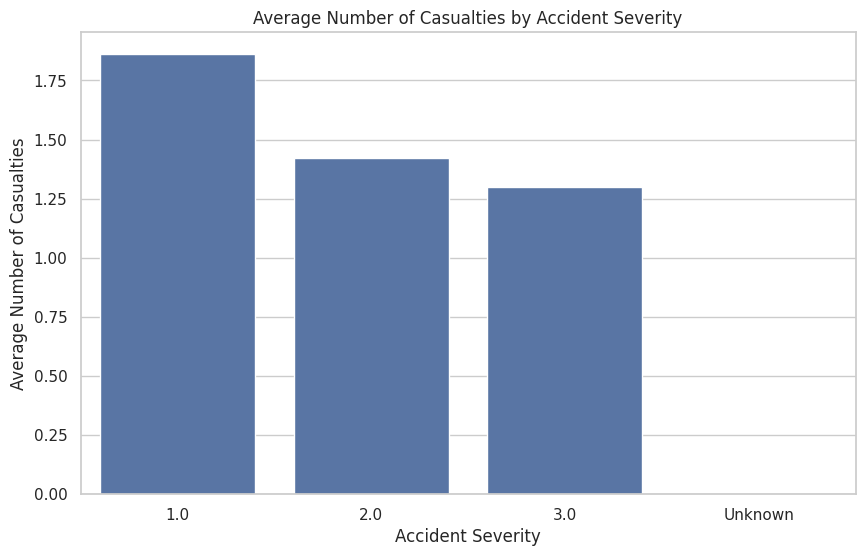

In [81]:
# Group by severity and calculate average number of casualties
accident_severity_casualties = df_accidents.groupby('Accident_Severity')['Number_of_Casualties'].mean().reset_index()

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x='Accident_Severity', y='Number_of_Casualties', data=accident_severity_casualties)
plt.title('Average Number of Casualties by Accident Severity')
plt.xlabel('Accident Severity')
plt.ylabel('Average Number of Casualties')
plt.show()


🌦️ 8.2 Accidents by Weather Conditions

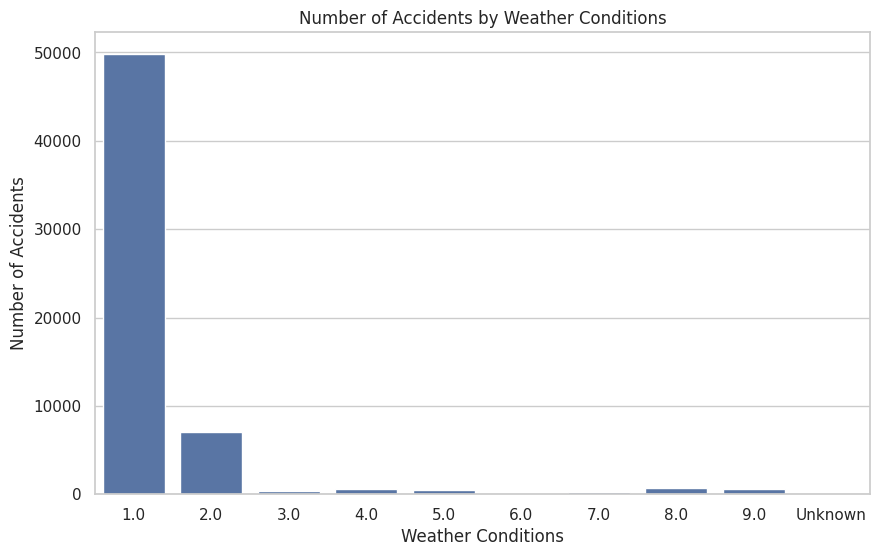

In [82]:
# Group by weather conditions and count accidents
weather_accidents = df_accidents.groupby('Weather_Conditions').size().reset_index(name='Accidents Count')

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x='Weather_Conditions', y='Accidents Count', data=weather_accidents)
plt.title('Number of Accidents by Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Accidents')
plt.show()


📅 8.3 Accidents by Day of Week

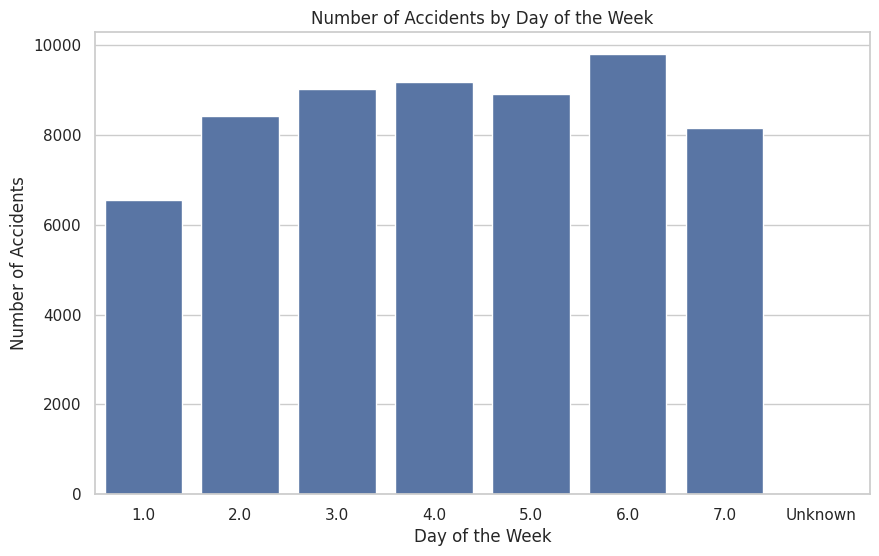

In [83]:
# Group by Day_of_Week and count accidents
day_of_week_accidents = df_accidents.groupby('Day_of_Week').size().reset_index(name='Accidents Count')

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x='Day_of_Week', y='Accidents Count', data=day_of_week_accidents)
plt.title('Number of Accidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.show()


🏆 9. Top Fatality Rate Districts

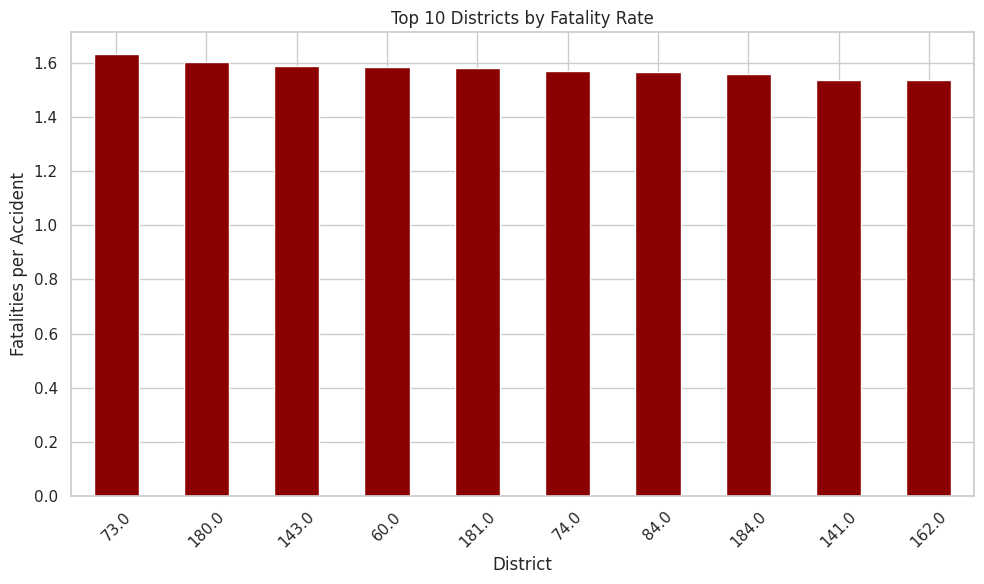

In [84]:
if 'Number_of_Casualties' in df_accidents.columns:
    fatalities = df_accidents.groupby('Local_Authority_(District)')['Number_of_Casualties'].sum()
    total_accidents = df_accidents.groupby('Local_Authority_(District)').size()

    fatality_rate = (fatalities / total_accidents).sort_values(ascending=False).head(10)

    plt.figure(figsize=(10,6))
    fatality_rate.plot(kind='bar', color='darkred')
    plt.title('Top 10 Districts by Fatality Rate')
    plt.ylabel('Fatalities per Accident')
    plt.xlabel('District')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()




In [86]:
!pip install dash plotly


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 33.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 14.4 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0


📊 10. Interactive Dashboard

In [88]:
import dash
from dash import dcc, html
import plotly.express as px
import pandas as pd

# Assuming df_accidents is already loaded
fig_accidents = px.line(df_accidents, x='Year', title='Accidents Over the Years')
fig_vehicles = px.histogram(df_accidents, x='Number_of_Vehicles', nbins=30, title='Distribution of Number of Vehicles in Accidents')
fig_severity = px.bar(df_accidents, x='Accident_Severity', title='Accident Severity Distribution')

app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Accident Analysis Dashboard", style={'text-align': 'center'}),
    html.Div([dcc.Graph(figure=fig_accidents)]),
    html.Div([dcc.Graph(figure=fig_vehicles)]),
    html.Div([dcc.Graph(figure=fig_severity)]),
])

if __name__ == '__main__':
    app.run(debug=True)



<IPython.core.display.Javascript object>